In [3]:
import matplotlib.pyplot as plt
import numpy as np 


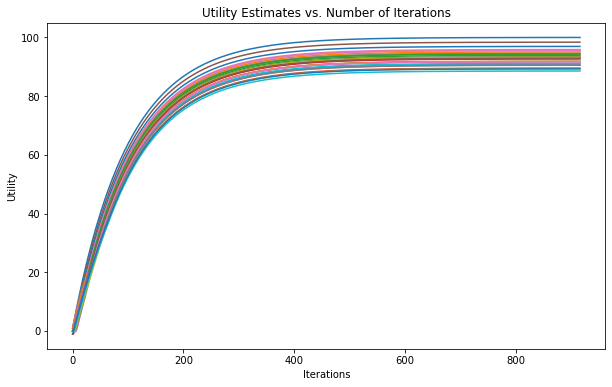

Number of iterations before it converges: 917

Optimal Policy:
[['up' 'Wall' 'left' 'left' 'left' 'up']
 ['up' 'left' 'left' 'left' 'Wall' 'up']
 ['up' 'left' 'left' 'up' 'left' 'left']
 ['up' 'left' 'left' 'up' 'up' 'up']
 ['up' 'Wall' 'Wall' 'Wall' 'up' 'up']
 ['up' 'left' 'left' 'left' 'up' 'up']]

Utilities of states:
[['99.99' 'Wall' '95.04' '93.87' '92.64' '93.32']
 ['98.38' '95.87' '94.54' '94.39' 'Wall' '90.91']
 ['96.94' '95.58' '93.28' '93.17' '93.09' '91.78']
 ['95.54' '94.44' '93.22' '91.11' '91.80' '91.88']
 ['94.30' 'Wall' 'Wall' 'Wall' '89.54' '90.56']
 ['92.93' '91.72' '90.53' '89.35' '88.56' '89.29']]


In [4]:

grid_size =(6,6)
walls = [(0, 1), ( 1, 4), ( 4, 1), ( 4, 3), (4, 2)]
green_squares = [(0, 0), (0, 2), ( 0, 5), (1, 3), ( 2, 4), (3, 5)]
brown_squares = [(1, 1), (2, 2), (1, 5), (3, 3), (4, 4)]
actions = ['up', 'down', 'left', 'right']

# Rewards setup
reward_green = 1
reward_white = -0.04
reward_brown = -1
rewards = np.full(grid_size, reward_white)
for x, y in green_squares:
    rewards[x, y] = reward_green
for x, y in brown_squares:
    rewards[x, y] = reward_brown

# Probability setup
prob_forward = 0.8
prob_side = 0.1

# Discount factor
gamma = 0.99

# Initialize utilities and policy
utilities = np.zeros(grid_size)
policy = np.full(grid_size, ' ', dtype='<U5')  # Placeholder for non-wall cells

# Function to check if a state is valid (not a wall and within grid)
def is_valid_state(x, y):
    return (0 <= x < grid_size[0]) and (0 <= y < grid_size[1]) and (x, y) not in walls

# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

# Value iteration
iteration = 0
utilities_history = []  # Track utilities for plotting
while True:
    delta = 0
    new_utilities = np.copy(utilities)
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if is_valid_state(x, y):
                max_utility = -np.inf
                for action in actions:
                    utility = rewards[x, y] + gamma * expected_utility(action, x, y)
                    if utility > max_utility:
                        max_utility = utility
                        policy[x, y] = action
                delta = max(delta, abs(max_utility - utilities[x, y]))
                new_utilities[x, y] = max_utility
    utilities = new_utilities
    utilities_history.append(utilities.copy())
    iteration += 1
    if delta < 0.01*(1-gamma)/gamma:  #Convergence criterion
        break

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
#plt.legend()
plt.show()

policy_readable = np.full(grid_size, 'Wall')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
        else:
            policy_readable[x, y] = 'Wall'

policy_readable

utilities_readable = np.full(grid_size, ' ', dtype='<U10')

# Populate the utilities_readable with the values from the utilities array
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if (x, y) in walls:
            utilities_readable[x, y] = 'Wall'
        
        else:
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"


print("Number of iterations before it converges:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)
